In [2]:
import pandas as pd  
import numpy as np   
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df = pd.read_csv("Customer-Churn-Records.csv")

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [6]:
df.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [7]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [9]:
df.rename(columns={"Exited": "Churn"}, inplace=True)

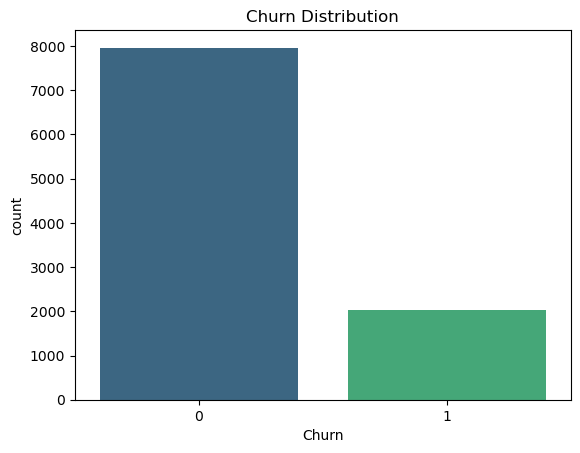

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="Churn", data=df, palette="viridis")
plt.title("Churn Distribution")
plt.show()

In [12]:
df["Gender"] = df["Gender"].map({"Male": 0, "Female": 1})


In [13]:
df = pd.get_dummies(df, columns=["Geography", "Card Type"], drop_first=True)

In [14]:
print(df.head()) 
print(df.info())  

   RowNumber  CustomerId   Surname  CreditScore  Gender  Age  Tenure  \
0          1    15634602  Hargrave          619       1   42       2   
1          2    15647311      Hill          608       1   41       1   
2          3    15619304      Onio          502       1   42       8   
3          4    15701354      Boni          699       1   39       1   
4          5    15737888  Mitchell          850       1   43       2   

     Balance  NumOfProducts  HasCrCard  ...  EstimatedSalary  Churn  Complain  \
0       0.00              1          1  ...        101348.88      1         1   
1   83807.86              1          0  ...        112542.58      0         1   
2  159660.80              3          1  ...        113931.57      1         1   
3       0.00              2          0  ...         93826.63      0         0   
4  125510.82              1          1  ...         79084.10      0         0   

   Satisfaction Score  Point Earned  Geography_Germany  Geography_Spain  \
0    

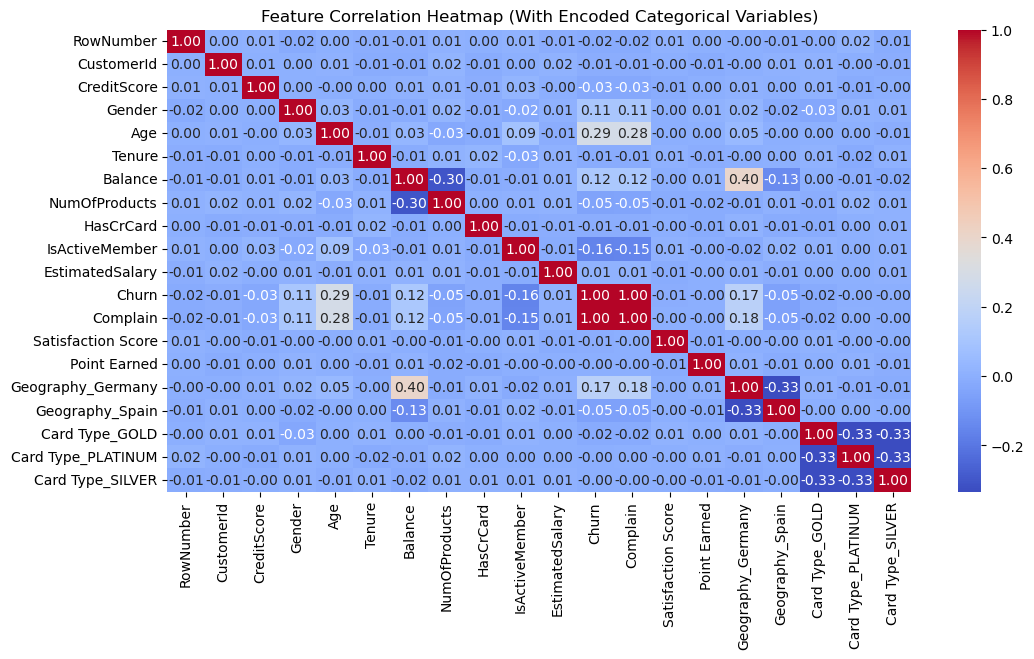

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap (With Encoded Categorical Variables)")
plt.show()

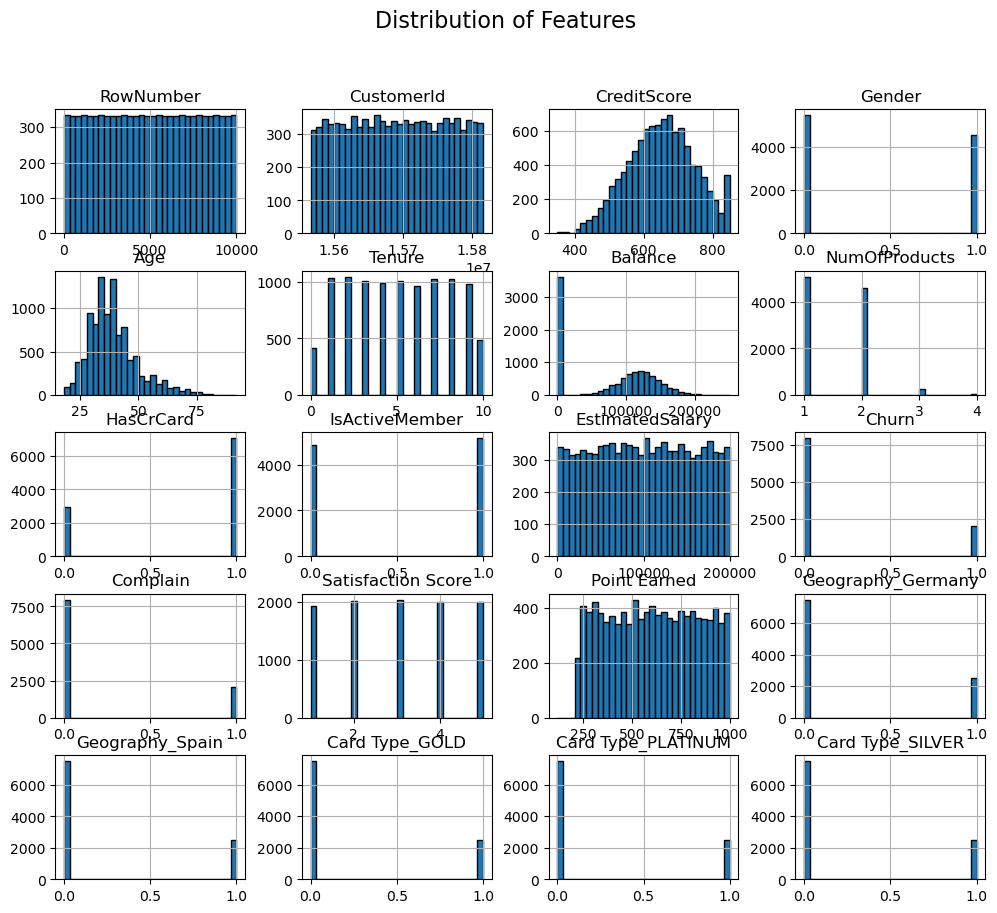

In [17]:
df.hist(figsize=(12,10), bins=30, edgecolor="black")
plt.suptitle("Distribution of Features", fontsize=16)
plt.show()

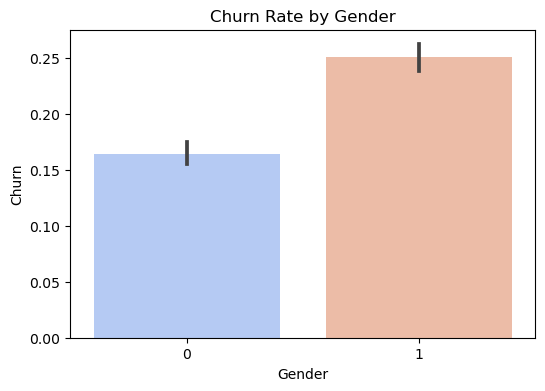

In [21]:
plt.figure(figsize=(6,4))
sns.barplot(x="Gender", y="Churn", data=df, palette="coolwarm")
plt.title("Churn Rate by Gender")
plt.show()

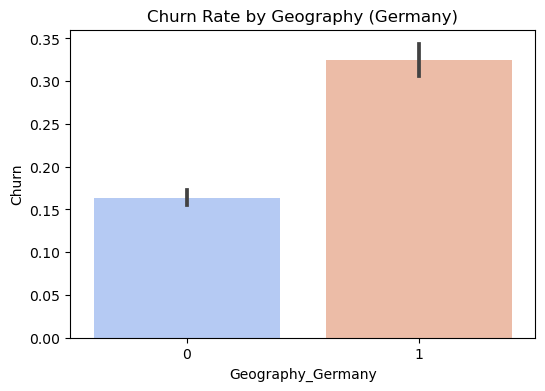

In [22]:
plt.figure(figsize=(6,4))
sns.barplot(x="Geography_Germany", y="Churn", data=df, palette="coolwarm")
plt.title("Churn Rate by Geography (Germany)")
plt.show()

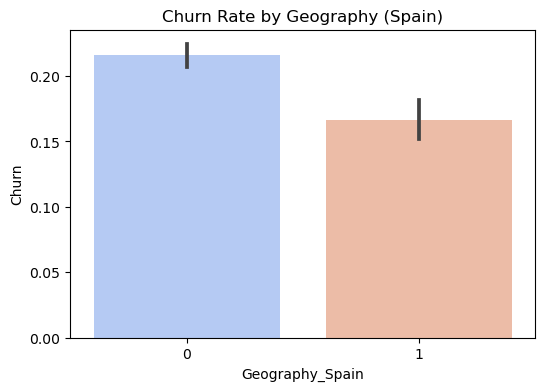

In [23]:
plt.figure(figsize=(6,4))
sns.barplot(x="Geography_Spain", y="Churn", data=df, palette="coolwarm")
plt.title("Churn Rate by Geography (Spain)")
plt.show()

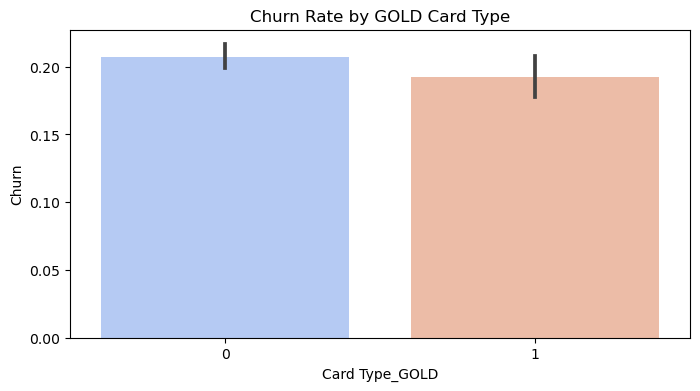

In [24]:
plt.figure(figsize=(8,4))
sns.barplot(x="Card Type_GOLD", y="Churn", data=df, palette="coolwarm")
plt.title("Churn Rate by GOLD Card Type")
plt.show()

C:\Users\colby\AppData\Local\Temp\ipykernel_27788\3899744066.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["Churn"]==0]["Age"], label="Not Churned", shade=True, color="blue")
C:\Users\colby\AppData\Local\Temp\ipykernel_27788\3899744066.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["Churn"]==1]["Age"], label="Churned", shade=True, color="red")


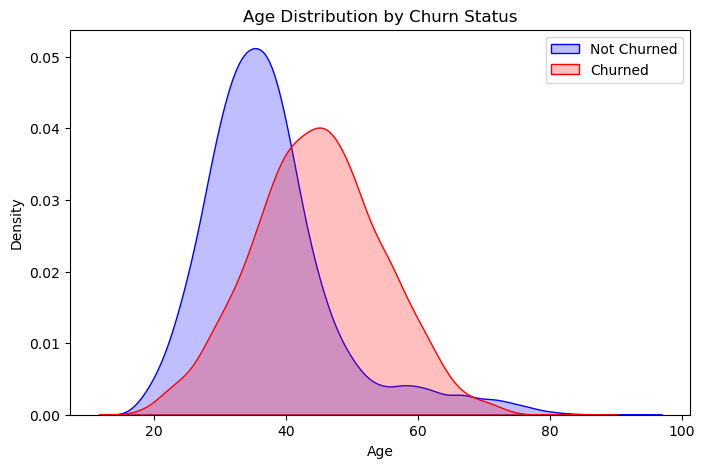

In [25]:
plt.figure(figsize=(8,5))
sns.kdeplot(df[df["Churn"]==0]["Age"], label="Not Churned", shade=True, color="blue")
sns.kdeplot(df[df["Churn"]==1]["Age"], label="Churned", shade=True, color="red")
plt.title("Age Distribution by Churn Status")
plt.xlabel("Age")
plt.legend()
plt.show()

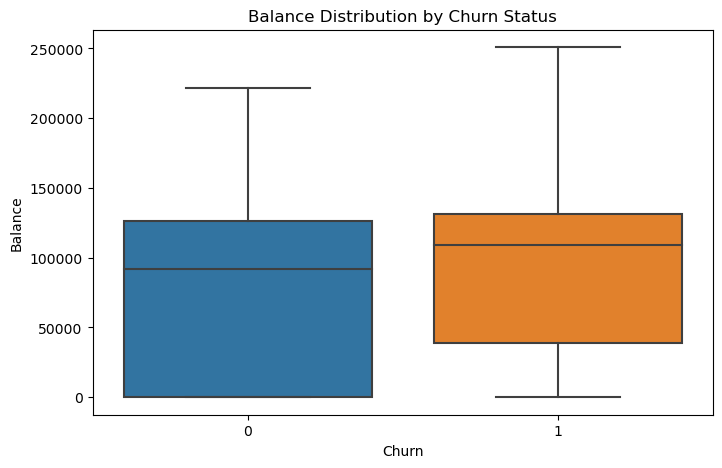

In [26]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Churn", y="Balance", data=df)
plt.title("Balance Distribution by Churn Status")
plt.show()

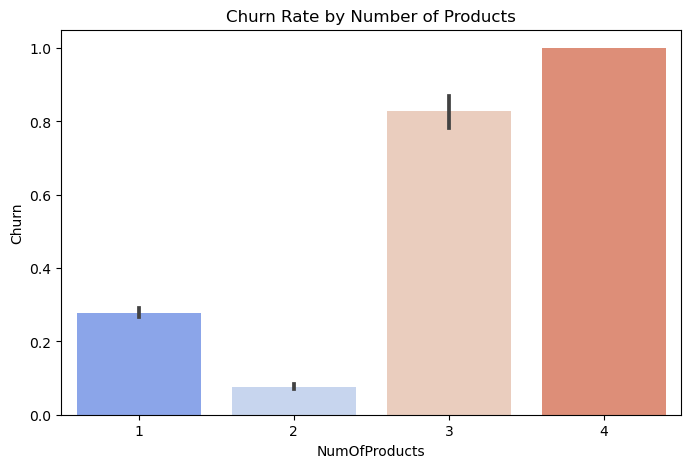

In [27]:
plt.figure(figsize=(8,5))
sns.barplot(x="NumOfProducts", y="Churn", data=df, palette="coolwarm")
plt.title("Churn Rate by Number of Products")
plt.show()


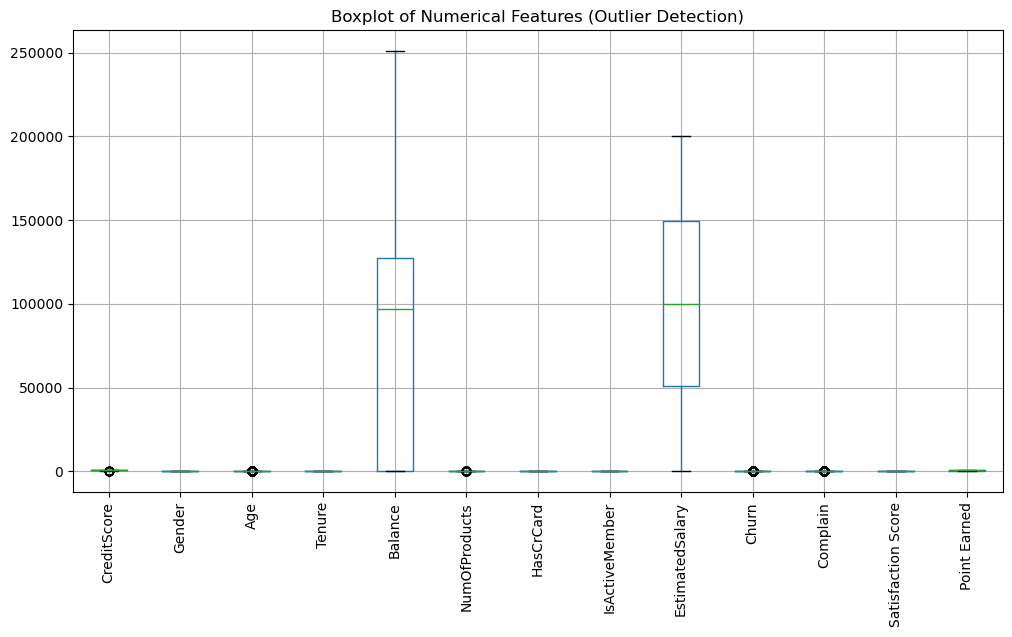

In [31]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Create boxplots for numeric features only
plt.figure(figsize=(12,6))
df[numeric_columns].boxplot(rot=90)
plt.title("Boxplot of Numerical Features (Outlier Detection)")
plt.show()

In [34]:
zero_salaries_count = (df["EstimatedSalary"] == 0).sum()
print(f"Number of customers with EstimatedSalary = 0: {zero_salaries_count}")


Number of customers with EstimatedSalary = 0: 0


In [39]:
df[df["EstimatedSalary"] < 1000].describe()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,Complain,Satisfaction Score,Point Earned,Geography_Germany,Geography_Spain,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,654.915254,0.491525,40.508475,5.525424,66971.133729,1.474576,0.694915,0.610169,564.963729,0.220339,0.220339,3.271186,626.796610,0.288136,0.135593,0.152542,0.254237,0.355932
std,101.577775,0.504219,10.619392,2.949903,64699.245623,0.503640,0.464396,0.491898,279.858224,0.418033,0.418033,1.471927,246.473946,0.456782,0.345295,0.362632,0.439169,0.482905
min,416.000000,0.000000,22.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000,0.000000,1.000000,234.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,571.500000,0.000000,34.000000,3.000000,0.000000,1.000000,0.000000,0.000000,357.215000,0.000000,0.000000,2.000000,409.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,649.000000,0.000000,38.000000,6.000000,87212.800000,1.000000,1.000000,1.000000,598.800000,0.000000,0.000000,3.000000,632.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,716.500000,1.000000,45.500000,8.000000,121614.195000,2.000000,1.000000,1.000000,792.215000,0.000000,0.000000,5.000000,858.000000,1.000000,0.000000,0.000000,0.500000,1.000000
max,850.000000,1.000000,74.000000,10.000000,204510.940000,2.000000,1.000000,1.000000,994.860000,1.000000,1.000000,5.000000,997.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
low_salary_df = df[df["EstimatedSalary"] < 1000]  # Customers earning less than 1000

print(f"Number of customers with EstimatedSalary < 1000: {len(low_salary_df)}")

Number of customers with EstimatedSalary < 1000: 59


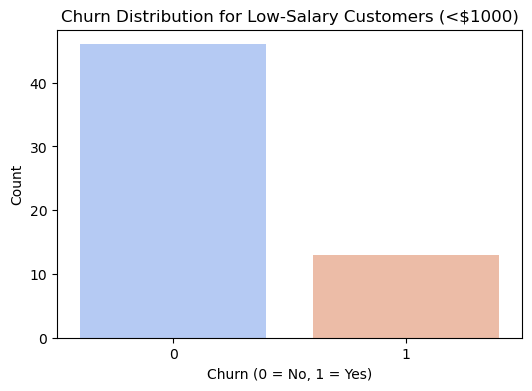

In [41]:
plt.figure(figsize=(6,4))
sns.countplot(x="Churn", data=low_salary_df, palette="coolwarm")
plt.title("Churn Distribution for Low-Salary Customers (<$1000)")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


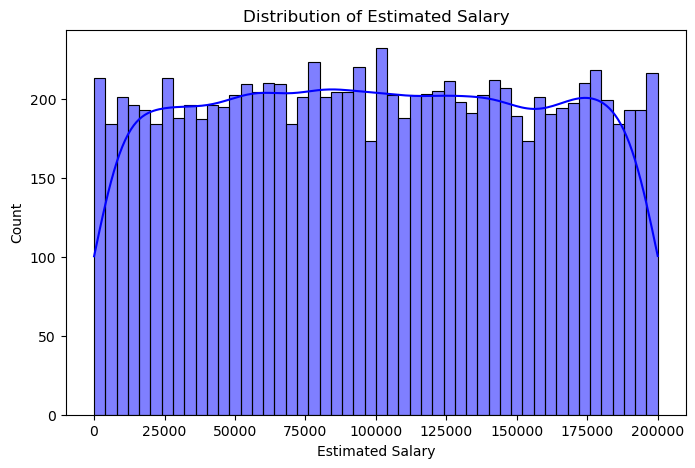

In [42]:

plt.figure(figsize=(8,5))
sns.histplot(df["EstimatedSalary"], bins=50, kde=True, color="blue")
plt.title("Distribution of Estimated Salary")
plt.xlabel("Estimated Salary")
plt.ylabel("Count")
plt.show()


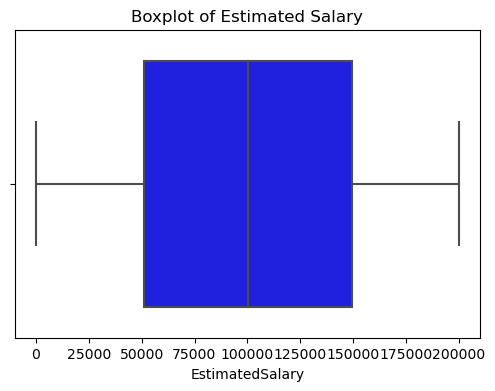

In [43]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df["EstimatedSalary"], color="blue")
plt.title("Boxplot of Estimated Salary")
plt.show()


C:\Users\colby\AppData\Local\Temp\ipykernel_27788\2839954012.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["Churn"] == 0]["EstimatedSalary"], label="Not Churned", shade=True, color="blue")
C:\Users\colby\AppData\Local\Temp\ipykernel_27788\2839954012.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["Churn"] == 1]["EstimatedSalary"], label="Churned", shade=True, color="red")


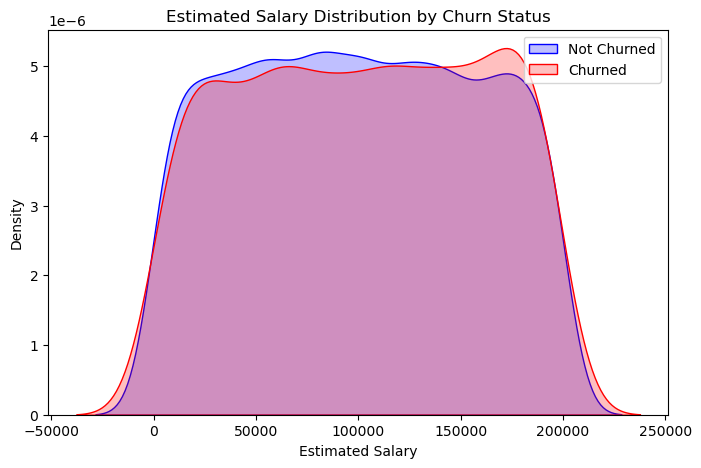

In [44]:
plt.figure(figsize=(8,5))
sns.kdeplot(df[df["Churn"] == 0]["EstimatedSalary"], label="Not Churned", shade=True, color="blue")
sns.kdeplot(df[df["Churn"] == 1]["EstimatedSalary"], label="Churned", shade=True, color="red")
plt.title("Estimated Salary Distribution by Churn Status")
plt.xlabel("Estimated Salary")
plt.legend()
plt.show()


In [1]:
import os
print(os.getcwd())


C:\Users\colby\Bank Customer Churn Prediction
